In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#read the test data
testdata = pd.read_csv(
    "sign_mnist_test.csv"
)
testdata.shape

(7172, 785)

In [4]:
#process the features
testFeatures = testdata.iloc[:, 1:785]
XT = testFeatures.to_numpy()
#XT = XT.reshape(-1, 28, 28)
#FinalXT = (XT - 127)/128

In [5]:
#process the labels
testLabels = testdata.iloc[:, 0]
testLabels.shape
YT = testLabels.to_numpy()

In [6]:
#read the training data
rawdata = pd.read_csv(
    "sign_mnist_train.csv",
    )
rawdata.shape


(27455, 785)

In [7]:
#process the features
trainFeatures = rawdata.iloc[:, 1:785]
X = trainFeatures.to_numpy()
#X = X.reshape(-1, 28, 28)
#FinalX = (X - 127)/128

In [8]:
#process the labels
trainLabels = rawdata.iloc[:, 0]
trainLabels.shape
Y = trainLabels.to_numpy()

TypeError: Invalid shape (784,) for image data

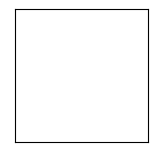

In [9]:
#assign names to the classes
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

#display some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # interpolation="gaussian"
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y[i]])
plt.show()

In [10]:
%timeit
#create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu",input_shape = (784,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(26, activation = "softmax")
])
#complile the model
model2.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#print a summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 26)                2626      
                                                                 
Total params: 101,326
Trainable params: 101,326
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "signDense_2/cp-{epoch:04d}.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 50

# Create a callback that saves the model's weights every 5 epochs
#cp_callback = tf.keras.callbacks.ModelCheckpoint(
    #filepath=checkpoint_path, 
    #verbose=1, 
    #save_weights_only=True,
    #save_freq=2*batch_size)


# Save the weights using the `checkpoint_path` format
model2.save_weights(checkpoint_path.format(epoch=0))


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1, monitor='val_accuracy',save_freq=550*9)

In [11]:
# Loads the weights
model2.load_weights("signDense_2\cp-1260.ckpt")

In [141]:
%%time 
#print time that it takes to train network

#train the model: epochs = (32(60)+22)*30/46.2 = 1261 (based on sample of 30 epochs, with total time 43.9s)
model2.fit(X, Y, epochs = 1261, batch_size= batch_size, ) #callbacks=[cp_callback] <- removed for saftey


Epoch 1/1261
550/550 [==============================] - 2s 3ms/step - loss: 6.1434 - accuracy: 0.2788
Epoch 2/1261
550/550 [==============================] - 2s 3ms/step - loss: 1.4245 - accuracy: 0.5670
Epoch 3/1261
550/550 [==============================] - 2s 3ms/step - loss: 0.9670 - accuracy: 0.6894
Epoch 4/1261
550/550 [==============================] - 2s 3ms/step - loss: 0.6570 - accuracy: 0.7799
Epoch 5/1261
550/550 [==============================] - 2s 3ms/step - loss: 0.7140 - accuracy: 0.7759
Epoch 6/1261
550/550 [==============================] - 2s 3ms/step - loss: 0.4453 - accuracy: 0.8487
Epoch 7/1261
550/550 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8660
Epoch 8/1261
550/550 [==============================] - 2s 3ms/step - loss: 0.4226 - accuracy: 0.8661
Epoch 9/1261
545/550 [============================>.] - ETA: 0s - loss: 0.4107 - accuracy: 0.8846
Epoch 9: saving model to signDense_2\cp-0009.ckpt
550/550 [===========================

In [12]:
#Evaluate the model
model2.evaluate(XT,YT)
predictions = model2.predict(XT)

225/225 [==============================] - 1s 2ms/step


In [13]:
predictions[2502]
for i in range(26):
    
    print(class_names[i] + ": ")
    print(predictions[2502][i])

A: 
4.931693e-07
B: 
6.157366e-05
C: 
9.983087e-10
D: 
0.14687276
E: 
8.7668175e-09
F: 
0.020449296
G: 
0.0034238694
H: 
0.0009516605
I: 
0.00011303533
J: 
7.62329e-11
K: 
0.12840143
L: 
0.027141677
M: 
6.0737115e-08
N: 
2.3453426e-07
O: 
8.2526097e-10
P: 
0.039360493
Q: 
2.1860455e-05
R: 
0.16229641
S: 
2.9141129e-06
T: 
0.003144387
U: 
0.14656073
V: 
0.12634367
W: 
0.1499595
X: 
0.04368884
Y: 
0.0012050945
Z: 
7.1277456e-11


TypeError: Invalid shape (784,) for image data

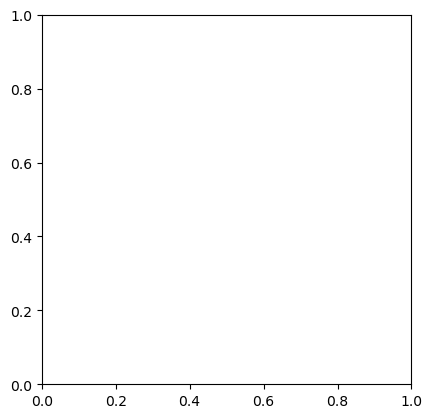

In [146]:
#item for the next blocks
item = 167

#show the true information about the item in question
plt.figure()
plt.imshow(XT[item],cmap="cividis", interpolation="gaussian")
#plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[YT[item]])
plt.show()

In [14]:
#display guesses and confidences
plt.figure
plt.bar(class_names, predictions[item]) 
plt.xlabel("Guess")
plt.ylabel("Confidence")


NameError: name 'item' is not defined

In [20]:
#find the best guess for each item in the test set
bestGuesses = []
bestGuess = 0
for i in range(7172):
    for j in range(26):
        if(predictions[i][j] >= predictions[i][bestGuess]):
            bestGuess = j
    bestGuesses.append(bestGuess)

In [21]:
#Compute per letter accuracy
numGuessed = []
numCorrect = []
propCorrect = []
for j in range(26):
      numCorrect.append(0)
      numGuessed.append(0)

#count the number of correct guesses
for i in range(7172):
    if(bestGuesses[i]  == YT[i]):
        numCorrect.insert(YT[i],(numCorrect.pop(YT[i])+1))
    numGuessed.insert(YT[i],(numGuessed.pop(YT[i])+1))

print(numGuessed)
print(numCorrect)
for i in range(26):
    if (0 != numGuessed[i]):
        propCorrect.append((1.0*numCorrect[i]/numGuessed[i]))
    else:
        propCorrect.append(0)


[331, 432, 310, 245, 498, 247, 348, 436, 288, 0, 331, 209, 394, 291, 246, 347, 164, 144, 246, 248, 266, 346, 206, 267, 332, 0]
[1, 0, 94, 0, 3, 0, 9, 12, 0, 0, 0, 0, 281, 1, 2, 5, 0, 92, 47, 0, 0, 0, 0, 0, 0, 0]


Text(0, 0.5, 'Accuracy')

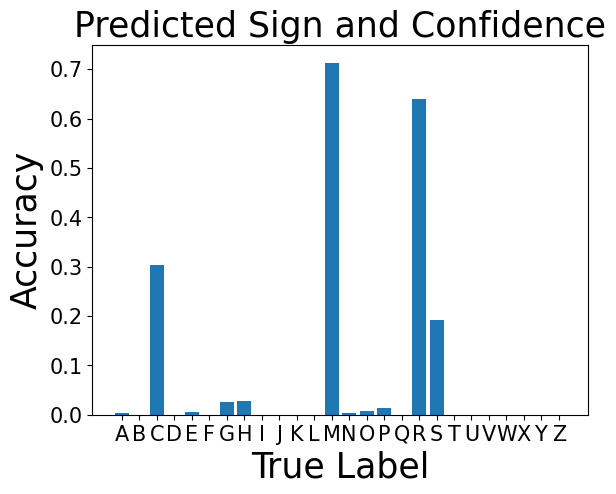

In [22]:
#display guesses and confidences
plt.figure
plt.bar(class_names, propCorrect) 
plt.title("Predicted Sign and Confidence",fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("True Label",fontsize = 25)
plt.ylabel("Accuracy",fontsize = 25)

In [23]:
#print out accuracy for each letter
for i in range(26):
    print(class_names[i])
    print(propCorrect[i])

A
0.0030211480362537764
B
0.0
C
0.3032258064516129
D
0.0
E
0.006024096385542169
F
0.0
G
0.02586206896551724
H
0.027522935779816515
I
0.0
J
0
K
0.0
L
0.0
M
0.7131979695431472
N
0.003436426116838488
O
0.008130081300813009
P
0.01440922190201729
Q
0.0
R
0.6388888888888888
S
0.1910569105691057
T
0.0
U
0.0
V
0.0
W
0.0
X
0.0
Y
0.0
Z
0
